In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import featureGet

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4



/home/xiaoran/Tools/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/xiaoran/Tools/anaconda3/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
def modelfit(alg, dtrain, features, label, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[features].values, label=dtrain[label].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds,verbose_eval=50)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[features], dtrain[label],eval_metric='auc')
        
    #Predict 验证集:
    dtrain_predictions = alg.predict(dtrain[features])
    dtrain_predprob = alg.predict_proba(dtrain[features])[:,1]
    
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[features])
    dtrain_predprob = alg.predict_proba(dtrain[features])[:,1]
    
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain[label].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[label], dtrain_predprob))
    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.head(30).plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [3]:
def runmodel(df_train,df_test, features, label, outfile):
    '''运行模型
    
    '''
    xgb1 = XGBClassifier(
         learning_rate =0.1,
         n_estimators=1000,
         max_depth=5,
         min_child_weight=1,
         gamma=0,
         subsample=0.8,
         colsample_bytree=0.8,
         objective= 'binary:logistic',
         scale_pos_weight=4,
         seed=27)

    modelfit(xgb1, df_train, features, label)
    
    proba_test = pd.DataFrame()
    proba_test['userid'] = df_test['userid']
    proba_test['orderType'] = [0 for i in range(len(df_test))]
    proba_test['orderType'] = xgb1.predict_proba(df_test[features])[:,1]

    # 写入结果文件
    proba_test.to_csv(outfile,index=False,index_label=False)
    
    return proba_test
    

In [ ]:
def Main():
    
    sub = []
    
    print("model 1-------------------->")
    # 第1个模型
    df_train,df_test,features,label = featureGet.getDataSet1()
    outfile1 = '../result/sub_1.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    # 第2个模型
    print("model 2-------------------->")
    df_train,df_test,features,label = featureGet.getDataSet2()
    outfile1 = '../result/sub_2.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    # 第3个模型
    print("model 3-------------------->")
    df_train,df_test,features,label = featureGet.getDataSet3()
    outfile1 = '../result/sub_3.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    # 第4个模型
    print("model 4-------------------->")
    df_train,df_test,features,label = featureGet.getDataSet4()
    outfile1 = '../result/sub_4.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    # 第5个模型
    print("model 5-------------------->")
    df_train,df_test,features,label = featureGet.getDataSet5()
    outfile1 = '../result/sub_5.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    # 第6个模型
    print("model 6-------------------->")
    df_train,df_test,features,label = featureGet.getDataSet6()
    outfile1 = '../result/sub_6.csv'
    sub.append(runmodel(df_train, df_test, features, label, outfile1))
    
    subAvg = sub[0]
    
    for i in range(1,len(sub)):
        subAvg['orderType'] = subAvg['orderType'] + sub[i]['orderType']
    
    subAvg['orderType'] = subAvg['orderType'] / len(sub)
    
    subAvg.to_csv('../result/subAvg.csv',index=False)
    

model 1-------------------->
[50]	train-auc:0.967128+0.000301504	test-auc:0.953143+0.00245969
[100]	train-auc:0.981838+0.000431403	test-auc:0.96057+0.00217339
[150]	train-auc:0.988553+0.000230105	test-auc:0.962627+0.00182349
[200]	train-auc:0.992785+0.000149901	test-auc:0.963197+0.00162011
[250]	train-auc:0.995432+0.000257322	test-auc:0.963451+0.00149301
[300]	train-auc:0.997168+0.000167175	test-auc:0.963533+0.00149098
[350]	train-auc:0.998241+9.89586e-05	test-auc:0.963661+0.00131318
[400]	train-auc:0.998947+7.06269e-05	test-auc:0.96375+0.0013985
[450]	train-auc:0.999399+5.41827e-05	test-auc:0.96363+0.0014256

Model Report
Accuracy : 0.9785
AUC Score (Train): 0.998058
model 2-------------------->
[0]	train-auc:0.89567+0.00619449	test-auc:0.889666+0.00966594
[50]	train-auc:0.966967+0.000516996	test-auc:0.952699+0.00257619
[100]	train-auc:0.981646+0.000470743	test-auc:0.960606+0.00192165
[150]	train-auc:0.988686+0.000206531	test-auc:0.962489+0.00176285
[200]	train-auc:0.992722+0.00011275

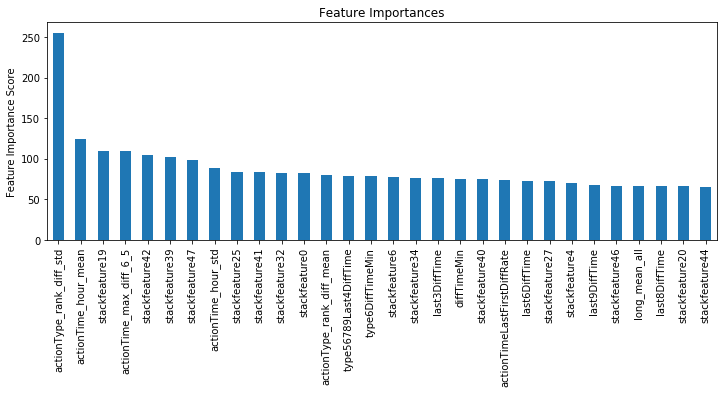

In [ ]:
Main()